# Exercices 2

[Télécharger l'exercice](../02_exercice.zip)

# Tutorial 1 : Vecteurs, indices, dimensions

Dans ce cours, nous allons intensivement travailler avec la notion de vecteurs (et matrices). Ces vecteurs seront des objects `numpy` du nom de la librarie qui permet de faire des opérations vecteurs/matrices.

Ainsi la comande suivant permet de définir un matrices remplies de zeros et de longeurs 10 :


In [1]:
import numpy as np
A = np.ones(10)
print(A)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


On peut accéder ou modifier des élément du vecteur `A` par ces indices, par example :

In [2]:
print(A[0])  # Premier élément
A[0] = 5     # Modifier le premier élément
print(A)
print(A[-1]) # Dernier élément

1.0
[5. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


Il faut bien avoir en tête que losque que l'on écrit `A[i] = l` on a 
```
A (vecteur)        i (indice)        l (valeur)
   │                   │                 │
   └───────────────► A[i]      =         l
```
Ainsi, A ne peut prendre en crochet qu'un indice (entier).

Dans le suite du cours ne seront souvent ammené a mettre à jour un vecteur, par exemple :

In [3]:
A = np.zeros(10)
print(A)  
A = A + 3     # Ajouter 3 à tous les éléments
print(A)  
A[0] += 1     # Modifier le premier élément
A[2] -= 3     # Modifier le troisième élément
A[5] += 5     # Modifier le cinquième élément
print(A)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[4. 3. 0. 3. 3. 8. 3. 3. 3. 3.]


# Tutorial 2 : Se familiariser avec les figures interactives

Le but ici est de se familiariser avec les figures interactives. Le code suivant permet d'afficher une figure interactive, avec un affichage régulier (mais non systématique). Faites tourner le code suivant qui affiche la position d'une particule sur le cercle trigonométrique. Essayez de changer la fréquence `nbout`, essayez de commenter `ax.clear()` et d'en déduire son utilité.

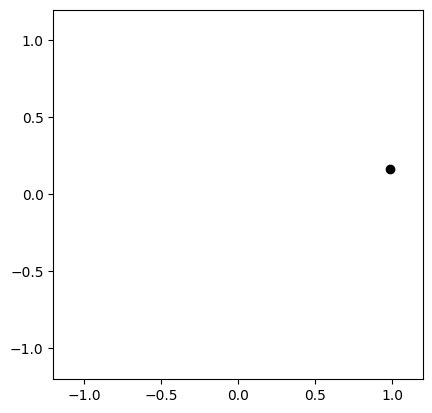

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

nbit = 1300
nbout = 30

# create the figure outside the loop 
fig, ax = plt.subplots()

for it in range(nbit):

    if it%nbout==0:
        clear_output(wait=True)  # clear the output in VS Code
        ax.clear()
        ax.scatter(np.cos(it*0.005), np.sin(it*0.005), c='k')
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        ax.set_aspect('equal')
        display(fig)
        plt.pause(0.1)  # pause to visualize updates
     

# Exercice 2: Trajectoire d'une voiture en 1D

Le but de cet exercice est de résoudre un premier exercice avec une discrétisation temporelle en 1D en résolvant les équations de la dynamique.

Une voiture se déplace sur une ligne droite à une vitesse $V=113$ km/h durant 16 heures et fait demi-tour dès que la distance $L=200$ km est parcourue. La vitesse de la voiture est définie comme un changement de position $x$ par temps $t$: 

$$V = \frac{\partial x}{\partial t}$$

Nous avons vu que cette dernière équation peut s'approximer ainsi:

$$x_{t+\Delta t} = x_t + V dt \qquad (1),$$

où $dt$ est le pas de temps. Ecrivez un code qui calcule la position de la voiture au cours du temps en suivant les étapes suivantes:
- i) définir les quantités physiques du modèle (vitesse, longueur maximale, etc.), 
- ii) définir les paramètres numériques / la discrétisation numérique, 
- iii) initialiser la géométrie du modèle, et enfin 
- iv)  implémenter la règle de mis à jour (1) au sein d'une boucle. 

Vous pouvez tester l'influence de différentes valeurs du pas de temps. Voici une ébauche de code.

```python
# import librairies
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# physical parameters
V    = ...           # speed, km/h
L    = ...           # maximum distance
dire = 1             # direction of vehicle
ttot = ...           # total time, hr

# numerical parameters 
dt   = ...           # timestep, hr
nt   =  ...          # nb of timesteps
nout = 3

# initialization
time = 0 
dist = 0

# create the figure outside the loop 
fig, ax = plt.subplots(figsize=(10, 1))

for it in range(1, nt):
    time += ...      # update time
    dist += ...      # update dist 
    if dist > L:
        dire = -1       # make U turn
    elif dist < 0:
        dire = 1        # make U turn
     
    # vizualization
    if it%nout==0:
        clear_output(wait=True)  # clear the output in VS Code
        ax.cla()  # clear the current axes
        ax.scatter(dist, 0, c='k')  # plot all points up to current time step
        ax.set_xlim(0, 200)  
        ax.set_ylim(-1,1)  
        ax.set_xlabel('Distance') 
        display(fig)  # display the figure
        plt.pause(0.1)  # pause to visualize updates
```

Reprenez cette ébauche de code, complétez le (en remplaçant les ...) et faite le tourner dans un nouveau bloc.

### ✅ **À vous de faire !**

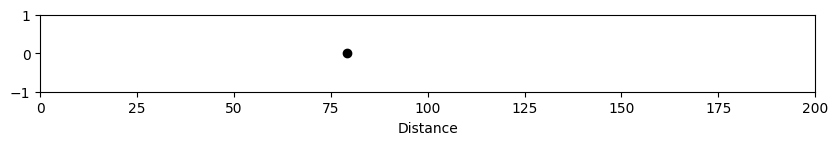

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display #  afin d'animer le tracé dans le temps.

# physical parameters
V = 113
L = 200
dire = 1
ttot = 16

# numerical parameters 
dt = 0.1
nt = int(ttot / dt)

nout = 1 # frequency of output

# initialization
time = 0
dist = 0

# create the figure outside the loop 
fig, ax = plt.subplots(figsize=(10, 1))
  
for it in range(1, nt):
    time += dt # update and record time
    dist += dire * V * dt # update dist 
    if dist > L:
        dire = -1       # make U turn
    elif dist < 0:
        dire = 1        # make U turn
     
    # vizualization
    if it%nout==0:
        clear_output(wait=True)  # clear the output  
        ax.cla()  # clear the current axes
        ax.scatter(dist, 0, c='k')  # plot all points up to current time step
        ax.set_xlim(0, 200)  
        ax.set_ylim(-1,1)  
        ax.set_xlabel('Distance') 
        display(fig)  # display the figure
        plt.pause(0.1)  # pause to visualize updates

# Exercice 3: Trajectoire d'une voiture en 2D

En se basant sur l'exercice précendent, supposez que la voiture se déplace dans un espace à deux dimensions durant 12 heures. La voiture a toujours une vitesse $V=113$ [km/h] mais elle le fait soit en direction du nord-est ou du nord-ouest. La voiture peut se déplacer dans un espace est-ouest (axe des x) de $L = 200$ km maximum. Elle commence son trajet au coin sud-ouest, part en direction du nord-est et tourne vers le nord-ouest une fois la longueur ouest-est $L$ dépassée et ainsi de suite en zig-zag. Ainsi la vitesse sud-nord est constante et la vitesse ouest-est oscille comme dans l'exercice précédent.

Commencez par reprendre le code de l'exercice précédent et modifiez le pour introduire la dimension $y$ (sud-nord) supplémentaire. Au lieu de tracer la position du véhicule en fonction de $x$, tracez la en deux dimensions (y vs. x). Pensez à:

- diviser la vitesse en deux composants: `V_x` et `V_y`,
- utiliser deux vecteurs pour enregistrer les coordonnées de la voiture: `distx` and `disty`.
- définir l'étendue de l'axe des ordonnées ($y$) de la figure pour éviter qu'elle ne change à chaque pas de temps grave aux fonctions `ax.set_xlim(0, 200)` et  `ax.set_ylim(0, 1000)`.  

### ✅ **À vous de faire !**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

V = 113
L = 200
dire = 1
ttot = 12
dt = 0.3
nt = int(ttot / dt)

# la voiture par dans la direction diagonal, il faut donc lui donner les vitesses en x et y, dont la norme est V.
Vx = np.cos(np.deg2rad(45)) * V  
Vy = Vx

# Initialization
distx = 0
disty = 0
time  = 0

# create the figure outside the loop 
fig, ax = plt.subplots()

for it in range(1, nt):
    time += dt

    if distx > L:
        dire = -1
    elif distx < 0:
        dire = 1

    distx += dire * Vx * dt
    disty += Vy * dt

    clear_output(wait=True)  # clear the output in VS Code
    ax.cla()  # clear the current axes
    ax.scatter(distx,disty,c='k')
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 1000)
    ax.set_xlabel('distance ouest-est')
    ax.set_ylabel('distance sud-nord') 
    display(fig)  # display the figure
    plt.pause(0.1)  # pause to visualize updates
